# Module-4: Trade Call Prediction using Classification

###### Loading required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 4.1 Loading dataset 

In [2]:
data = pd.read_csv('Nifty50.csv')
data.Date = pd.to_datetime(data['Date'])
data = data.set_index(data['Date'])

data['Bollinger'] = data['Close'].rolling(14).mean()
std = data['Close'].rolling(14).std()
data['upper_band'] = data['Bollinger']+2*std
data['lower_band'] = data['Bollinger']-2*std
data = data.dropna()

In [3]:
data

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Bollinger,upper_band,lower_band
Date,,,,,,,,,,
2017-06-01,2017-06-01,9603.55,9634.65,9589.90,9616.10,181533283,9482.61,9506.953571,9693.707883,9320.199260
2017-06-02,2017-06-02,9657.15,9673.50,9637.45,9653.50,167195027,8564.30,9521.817857,9720.230456,9323.405258
2017-06-05,2017-06-05,9656.30,9687.20,9640.70,9675.10,131685021,7192.24,9533.450000,9747.893211,9319.006789
2017-06-06,2017-06-06,9704.25,9709.30,9630.20,9637.15,150379695,8416.55,9541.407143,9762.775002,9320.039284
2017-06-07,2017-06-07,9663.95,9678.55,9630.55,9663.90,165669924,8989.36,9558.153571,9778.507146,9337.799997
...,...,...,...,...,...,...,...,...,...,...
2019-05-07,2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84,11674.860714,11843.740850,11505.980578
2019-05-08,2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01,11654.575000,11893.436253,11415.713747
2019-05-09,2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86,11626.821429,11929.534529,11324.108328


In [4]:
data['Call'] = 'Short'
data.loc[data['Open']<data['lower_band'], 'Call'] = 'Buy'
data.loc[(data['Open']>data['lower_band'])&(data['Open']<data['Bollinger']), 'Call'] = 'Hold Buy'
data.loc[(data['Open']>data['Bollinger'])&(data['Open']<data['upper_band']), 'Call'] = 'Hold Short'

In [5]:
data['Call'].value_counts()

Hold Short    312
Hold Buy      153
Short          10
Buy             6
Name: Call, dtype: int64

In [6]:
X = data[['Open','lower_band', 'Bollinger', 'upper_band']].values
y = data[['Call']].values

###### Logistic regression

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y) 
lr_clf = LogisticRegression()

In [8]:
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [9]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

print('F1 score:', f1_score(y_test, y_pred,average='weighted'))
print('Acuuracy:', accuracy_score(y_test, y_pred))

F1 score: 1.0
Acuuracy: 1.0


###### Support vector machine

In [10]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
print('F1 score:', f1_score(y_test, svm_clf.predict(X_test),average='weighted'))
print('Acuuracy:', accuracy_score(y_test, svm_clf.predict(X_test)))

F1 score: 0.8740820629650277
Acuuracy: 0.8925619834710744


###### Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
print('F1 score:', f1_score(y_test, dt_clf.predict(X_test),average='weighted'))
print('Acuuracy:', accuracy_score(y_test, dt_clf.predict(X_test)))

F1 score: 0.8888371551623793
Acuuracy: 0.8925619834710744


Simple model (Logistic regression) performs better than complex models(SVM, DT)

###### VOLTAS dataset

In [14]:
voltas = pd.read_csv('VOLTAS.csv')
voltas = voltas[voltas['Series']=='EQ'] 
voltas.Date = pd.to_datetime(voltas['Date'])
voltas = voltas.set_index('Date')

In [15]:
voltas['Bollinger'] = voltas['Close Price'].rolling(14).mean()
std = voltas['Close Price'].rolling(14).std()
voltas['upper_band'] = voltas['Bollinger']+2*std
voltas['lower_band'] = voltas['Bollinger']-2*std
voltas = voltas.dropna()

In [17]:
X = voltas[['Close Price', 'lower_band', 'Bollinger', 'upper_band']].values
voltas['Call Predicted'] = lr_clf.predict(X)
voltas.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Bollinger,upper_band,lower_band,Call Predicted
Date,,,,,,,,,,,,,,,,,,
2017-06-01,VOLTAS,EQ,486.35,486.50,512.6,482.40,509.20,508.85,505.43,4560228,2.304885e+09,65413,895218,19.63,452.500000,523.583937,381.416063,Hold Short
2017-06-02,VOLTAS,EQ,508.85,513.35,514.0,498.30,501.45,500.45,503.41,2365246,1.190680e+09,39411,592903,25.07,457.400000,531.735311,383.064689,Hold Short
2017-06-05,VOLTAS,EQ,500.45,501.00,503.0,493.55,494.75,494.95,497.33,1025382,5.099498e+08,29820,254832,24.85,461.864286,537.244618,386.483953,Hold Short
2017-06-06,VOLTAS,EQ,494.95,495.00,498.3,484.40,485.95,487.00,488.42,1495351,7.303576e+08,46226,760770,50.88,465.921429,540.064458,391.778399,Hold Short
2017-06-07,VOLTAS,EQ,487.00,490.00,490.0,480.20,484.20,483.25,482.84,1913739,9.240375e+08,41063,1179282,61.62,470.860714,539.111679,402.609750,Hold Short


## 4.2 Classification to make Trade Call

In [18]:
voltas2 = pd.read_csv('VOLTAS.csv')
voltas2 = voltas2[voltas2['Series']=='EQ'] 
voltas2.Date = pd.to_datetime(voltas2['Date'])
voltas2 = voltas2.set_index('Date')
voltas2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2017-05-15 to 2019-05-13
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  494 non-null    object 
 1   Series                  494 non-null    object 
 2   Prev Close              494 non-null    float64
 3   Open Price              494 non-null    float64
 4   High Price              494 non-null    float64
 5   Low Price               494 non-null    float64
 6   Last Price              494 non-null    float64
 7   Close Price             494 non-null    float64
 8   Average Price           494 non-null    float64
 9   Total Traded Quantity   494 non-null    int64  
 10  Turnover                494 non-null    float64
 11  No. of Trades           494 non-null    int64  
 12  Deliverable Qty         494 non-null    int64  
 13  % Dly Qt to Traded Qty  494 non-null    float64
dtypes: float64(9), int64(3)

In [19]:
voltas2['open_close_perc'] = ((voltas2['Open Price']-voltas2['Close Price'])/voltas2['Open Price'])*100
voltas2['high_low_perc'] = ((voltas2['High Price']-voltas2['Low Price'])/voltas2['High Price'])*100
voltas2['roll5_mean_perc'] = (voltas2['Close Price'].rolling(5).mean()).pct_change()*100
voltas2['roll5_std_perc'] = (voltas2['Close Price'].rolling(5).std()).pct_change()*100
voltas2 = voltas2.fillna(0)

In [20]:
l=[]
for i in range(493):
    if voltas2['Close Price'][i]<voltas2['Close Price'][i+1]:
        l.append(1)
    elif voltas2['Close Price'][i]>voltas2['Close Price'][i+1]:
        l.append(-1)
    else:
        l.append('NaN')
l.append('NaN')

voltas2['Action'] =  np.array([l]).reshape((len(l),1))   

In [21]:
X = voltas2[['open_close_perc', 'high_low_perc', 'roll5_mean_perc', 'roll5_std_perc']].values
y = voltas2[['Action']].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y) 

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
print('Accuracy:', accuracy_score(y_test, rf_clf.predict(X_test)))

Accuracy: 0.532258064516129


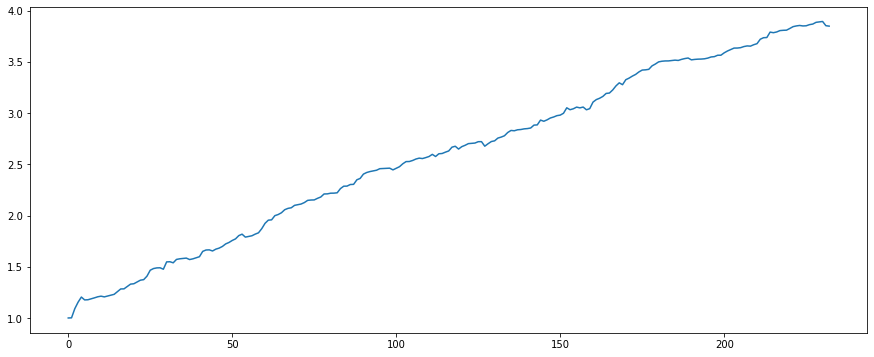

In [48]:
pridicted_Y = rf_clf.predict(X)[:-1].astype('int')
pridicted_Y = np.hstack((1, pridicted_Y))

raw = np.array([i*j for i, j in zip(pridicted_Y, voltas2['Close Price'])])

temp = [1, ]

for i in range(1, len(pridicted_Y)):
    if pridicted_Y[i] < 1:
        continue    
    else:
        profit = (voltas2['Close Price'][i] - abs(voltas2['Close Price'][i-1])) / abs(voltas2['Close Price'][i-1])
        temp.append(profit)


returns_perc = []
for i in range(1, len(temp)):
    returns_perc.append(np.sum(temp[:i]))

fig, ax  = plt.subplots(figsize=(15, 6))
ax.plot(range(len(returns_perc)), returns_perc)
plt.show()